<a href="https://colab.research.google.com/github/TaeMD/ML-projects/blob/main/Mortality_Prediction_ICU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import math
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
import keras


import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Mortality Prediction in ICU/train.csv")

In [4]:
labels = pd.read_csv('/content/drive/MyDrive/Mortality Prediction in ICU/labels.csv')

In [5]:
df.head()

,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,...,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH
0,77.0,31.0,46.0,54,2.973333,10.500000,0.7,154.0,0.750000,58.795833,...,17.428571,97.250000,116.891892,37.357143,2.1,0.14,171.052632,10.300000,80.060976,7.387273
1,77.0,31.0,46.0,76,2.973333,18.333333,0.7,154.0,1.100000,58.897059,...,19.000000,96.833333,113.411765,36.939130,2.1,0.14,151.560976,11.266667,80.670588,7.395000
2,116.0,83.0,199.5,44,2.500000,4.666667,2.9,154.0,0.333333,67.125000,...,19.000000,95.000000,125.687500,37.800000,2.1,0.14,124.951219,4.700000,56.700000,7.495000
3,105.0,12.0,15.0,68,4.400000,17.666667,0.2,154.0,0.766667,58.795833,...,15.457627,97.250000,116.891892,36.223077,2.1,0.14,545.833333,9.400000,84.600000,7.387273
4,77.0,31.0,46.0,88,3.300000,35.000000,0.7,154.0,1.000000,58.795833,...,19.166667,97.250000,116.891892,36.880000,2.1,0.14,62.131579,4.300000,80.060976,7.387273


In [6]:
labels.head()

,In-hospital_death
0,0
1,0
2,0
3,0
4,0


Exploratory Data Analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 42 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ALP          3999 non-null   float64
 1   ALT          3999 non-null   float64
 2   AST          3999 non-null   float64
 3   Age          3999 non-null   int64  
 4   Albumin      3999 non-null   float64
 5   BUN          3999 non-null   float64
 6   Bilirubin    3999 non-null   float64
 7   Cholesterol  3999 non-null   float64
 8   Creatinine   3999 non-null   float64
 9   DiasABP      3999 non-null   float64
 10  FiO2         3999 non-null   float64
 11  GCS          3999 non-null   float64
 12  Gender       3999 non-null   int64  
 13  Glucose      3999 non-null   float64
 14  HCO3         3999 non-null   float64
 15  HCT          3999 non-null   float64
 16  HR           3999 non-null   float64
 17  Height       3999 non-null   float64
 18  ICUType      3999 non-null   int64  
 19  K     

In [8]:
df.describe()

,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,...,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,...,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,89.259978,91.709903,130.219258,64.247562,2.975942,25.449665,1.216527,152.403601,1.363130,59.262693,...,19.223967,96.940907,118.145550,36.956291,2.368702,0.337362,133.363074,12.521058,82.799384,7.488870
std,70.397850,427.290858,590.482153,17.563142,0.404440,20.586576,2.961385,13.891279,1.406947,9.080069,...,2.074830,2.296143,16.540816,0.727382,2.418656,1.276145,117.304284,6.466063,23.117431,2.986373
min,12.000000,3.000000,6.000000,15.000000,1.100000,2.250000,0.100000,0.000000,0.200000,0.000000,...,10.543478,38.800000,0.000000,21.644615,0.300000,0.010000,0.000000,0.100000,3.500000,6.311667
25%,77.000000,31.000000,46.000000,52.500000,2.973333,13.000000,0.700000,154.000000,0.700000,55.843712,...,19.000000,97.230769,111.099359,36.614286,2.100000,0.125000,74.044118,8.900000,68.201064,7.364142
50%,77.000000,31.000000,46.000000,67.000000,2.973333,19.000000,0.700000,154.000000,0.933333,58.795833,...,19.000000,97.250000,116.891892,36.968750,2.100000,0.140000,111.032258,11.466667,80.060976,7.387273
75%,82.000000,32.250000,49.000000,78.000000,3.000000,30.000000,0.700000,154.000000,1.366667,62.210006,...,19.290323,97.250000,123.504098,37.364401,2.100000,0.140000,160.419207,14.950000,93.040476,7.407500
max,1472.333333,9143.428571,15680.000000,90.000000,5.300000,170.833333,46.366667,330.000000,16.457143,106.666667,...,39.655172,100.000000,181.725000,39.748980,49.200000,24.040000,3082.380952,137.233333,300.000000,128.532500


In [9]:
labels.shape

(3999, 1)

In [25]:
labels_counts= labels['In-hospital_death'].value_counts()
labels_counts 

0    3445
1     554
Name: In-hospital_death, dtype: int64

In [31]:
type(labels_counts)

pandas.core.series.Series

In [28]:
labels_df = pd.DataFrame({'mortality':labels_counts.index, 'values':labels_counts.values})

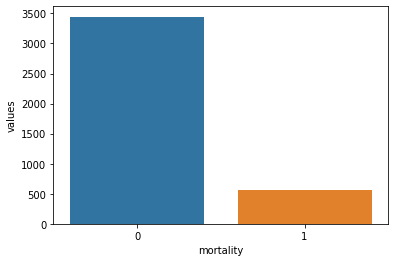

In [30]:
sns.barplot(x='mortality', y='values', data = labels_df)

In [32]:
new_df = pd.concat([df, labels], axis = 1)

In [33]:
new_df

,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,...,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH,In-hospital_death
0,77.0,31.00,46.000000,54,2.973333,10.500000,0.700000,154.0,0.750000,58.795833,...,97.250000,116.891892,37.357143,2.1,0.140,171.052632,10.300000,80.060976,7.387273,0
1,77.0,31.00,46.000000,76,2.973333,18.333333,0.700000,154.0,1.100000,58.897059,...,96.833333,113.411765,36.939130,2.1,0.140,151.560976,11.266667,80.670588,7.395000,0
2,116.0,83.00,199.500000,44,2.500000,4.666667,2.900000,154.0,0.333333,67.125000,...,95.000000,125.687500,37.800000,2.1,0.140,124.951219,4.700000,56.700000,7.495000,0
3,105.0,12.00,15.000000,68,4.400000,17.666667,0.200000,154.0,0.766667,58.795833,...,97.250000,116.891892,36.223077,2.1,0.140,545.833333,9.400000,84.600000,7.387273,0
4,77.0,31.00,46.000000,88,3.300000,35.000000,0.700000,154.0,1.000000,58.795833,...,97.250000,116.891892,36.880000,2.1,0.140,62.131579,4.300000,80.060976,7.387273,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,82.0,32.25,49.000000,70,3.000000,16.000000,0.700000,145.0,0.900000,68.865385,...,97.230769,117.230769,37.004762,2.2,0.125,50.769231,14.500000,87.000000,7.381429,0
3995,82.0,32.25,49.000000,25,3.000000,4.400000,0.700000,117.0,0.840000,58.754774,...,97.230769,117.820733,36.580000,2.2,0.125,584.375000,4.733333,166.400000,7.385000,0
3996,51.0,20.00,20.000000,44,3.000000,7.750000,0.500000,145.0,1.125000,74.166667,...,97.230769,125.666667,37.792308,2.2,0.125,116.472222,11.066667,109.000000,7.396667,0
3997,169.0,1971.00,1685.333333,37,3.100000,89.250000,0.733333,145.0,9.650000,92.923077,...,97.230769,166.615385,38.418182,2.2,0.125,11.230769,13.025000,87.400000,7.416000,1


In [ ]:
correlation_map = new_df[new_df.columns].corr()
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)]